In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

In [2]:
data = pd.read_csv('new_combined_data.csv')

In [3]:
#Select features for model training (removed the removed features)
X = data[[
    'num_words_in_transcript',
    'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
    'transcript_length', 'resume_length',
    'job_description_experience_match', 'text_complexity_transcript',
    'text_complexity_resume', 'lexical_diversity', 
    'technical_skill_match', 'soft_skills_sentiment',
    'cultural_fit_sentiment', 'job_fit_score', 'confidence_score',
    'clarity_score', 'job_desc_complexity', 'interaction_quality'
]]

y = data['decision']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning: Try different values for regularization strength (C)
param_grid = {'C': [0.1, 0.5, 1, 5, 10]}  # Inverse of regularization strength
log_reg = LogisticRegression(solver='liblinear')

# Use GridSearchCV to find the best regularization parameter C
grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameter and model
best_C = grid_search.best_params_['C']
best_log_reg_model = grid_search.best_estimator_

# Predict on test set
y_pred_prob = best_log_reg_model.predict_proba(X_test)[:, 1]
y_pred_binary = best_log_reg_model.predict(X_test)

# Calculate accuracy and ROC AUC
log_reg_accuracy = accuracy_score(y_test, y_pred_binary)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_roc_auc = auc(fpr, tpr)

# Output the best model's parameters and performance
print(f"Best Logistic Regression Accuracy: {log_reg_accuracy*100:.4f}")
print(f"Best Logistic Regression AUC: {log_reg_roc_auc:.4f}")

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Logistic Regression Accuracy: 80.1575
Best Logistic Regression AUC: 0.8756


c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# --- Error Analysis ---
error_analysis = X_test.copy()
error_analysis['True Label'] = y_test
error_analysis['Predicted Label'] = y_pred_binary
error_analysis['Error'] = error_analysis['True Label'] != error_analysis['Predicted Label']

# Display misclassified samples
misclassified_samples = error_analysis[error_analysis['Error'] == True]
print("Misclassified Instances:")
print(misclassified_samples.head())  # Displaying the first few misclassified instances

Misclassified Instances:
      num_words_in_transcript  resume_jd_similarity  \
1771                      735              0.204282   
2339                      643              0.257122   
654                       548              0.213232   
2226                      874              0.155249   
1551                      539              0.335625   

      resume_transcript_similarity  sentiment  transcript_length  \
1771                      0.369067     0.9971                926   
2339                      0.603052     0.9992                848   
654                       0.252388     0.9965                673   
2226                      0.528370     0.9989               1123   
1551                      0.430371     0.9971                678   

      resume_length  job_description_experience_match  \
1771            509                                16   
2339            545                                 5   
654             374                                15   
2226   

In [7]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_samples)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 126'

In [8]:
# Fit the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Now you can calculate the impact as you were doing
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg_model.coef_[0],  # Coefficients from the model
    'Impact': abs(log_reg_model.coef_[0]) * X_train.std()  # Impact = coefficient * std deviation
})

# Sorting by impact to see the features with the highest influence
coefficients_sorted = coefficients.sort_values(by='Impact', ascending=False)

# Printing the impact analysis summary
print("Impact Analysis (Logistic Regression):")
print(coefficients_sorted)

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Impact Analysis (Logistic Regression):
                                                           Feature  \
interaction_quality                            interaction_quality   
num_words_in_transcript                    num_words_in_transcript   
transcript_length                                transcript_length   
confidence_score                                  confidence_score   
text_complexity_transcript              text_complexity_transcript   
cultural_fit_sentiment                      cultural_fit_sentiment   
clarity_score                                        clarity_score   
job_desc_complexity                            job_desc_complexity   
resume_length                                        resume_length   
text_complexity_resume                      text_complexity_resume   
resume_transcript_similarity          resume_transcript_similarity   
resume_jd_similarity                          resume_jd_similarity   
job_fit_score                                      

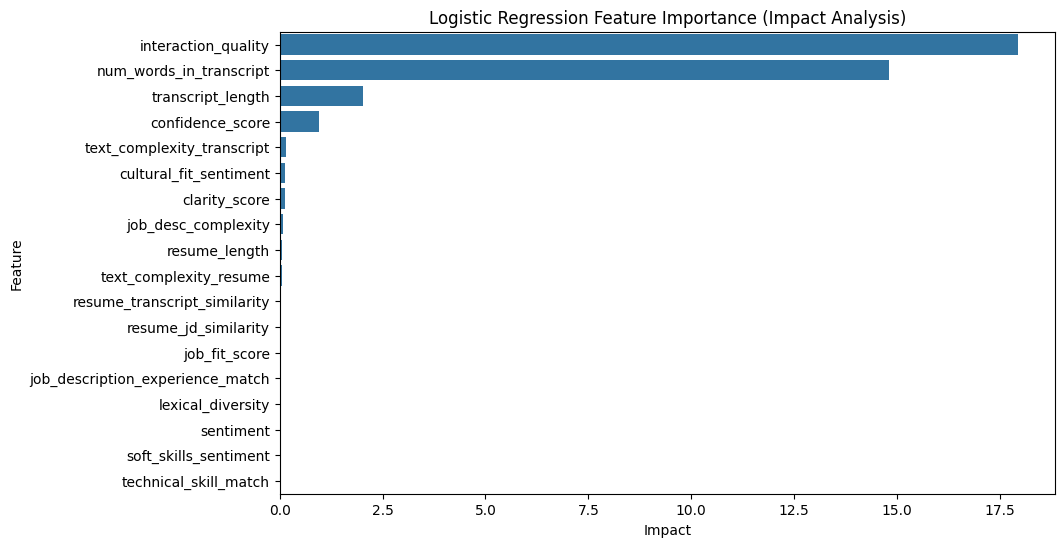

Summary of Feature Importance:
The plot above shows the importance of features in predicting the target variable based on their impact. The impact is calculated as the product of the absolute coefficient and the standard deviation of each feature.

Top 5 most impactful features:
interaction_quality: Coefficient = 0.1256, Impact = 17.9415
num_words_in_transcript: Coefficient = -0.1060, Impact = 14.8166
transcript_length: Coefficient = -0.0112, Impact = 2.0181
confidence_score: Coefficient = -0.5142, Impact = 0.9569
text_complexity_transcript: Coefficient = -0.3838, Impact = 0.1498


In [9]:
# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Impact', y='Feature', data=coefficients_sorted)
plt.title('Logistic Regression Feature Importance (Impact Analysis)')
plt.show()

# --- Summary ---
top_features = coefficients_sorted.head(5)  # Top 5 features by impact

# Summarizing the plot
print("Summary of Feature Importance:")
print(f"The plot above shows the importance of features in predicting the target variable based on their impact. The impact is calculated as the product of the absolute coefficient and the standard deviation of each feature.")
print("\nTop 5 most impactful features:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: Coefficient = {row['Coefficient']:.4f}, Impact = {row['Impact']:.4f}")

Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_
dt_y_pred = dt_best.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])

In [11]:
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print(f'Decision Tree ROC AUC: {dt_roc_auc:.4f}')

Decision Tree Accuracy: 85.20%
Decision Tree ROC AUC: 0.9054


In [12]:
# Error Analysis
dt_errors = X_test.copy()
dt_errors['True Label'] = y_test
dt_errors['Predicted Label'] = dt_best.predict(X_test)
dt_errors['Error'] = dt_errors['True Label'] != dt_errors['Predicted Label']

# Display a few misclassified instances
misclassified_dt = dt_errors[dt_errors['Error'] == True]
print("Misclassified Instances (Decision Tree):")
print(misclassified_dt.head())

Misclassified Instances (Decision Tree):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1771                      735              0.204282   
1850                      636              0.181735   
3115                      847              0.269972   
1094                      562              0.223817   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9952                799   
1771                      0.369067     0.9971                926   
1850                      0.290789     0.9977                881   
3115                      0.380608     0.9991               1190   
1094                      0.328240     0.9985                834   

      resume_length  job_description_experience_match  \
1655            490                                15   
1771            509                                16   
1850            474                             

In [13]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_dt)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 94'

In [14]:
 # Impact Analysis (using feature importances)
dt_feature_importance = dt_best.feature_importances_
dt_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Decision Tree):")
print(dt_impact_analysis)

Impact Analysis (Decision Tree):
                             Feature  Importance
15                     clarity_score    0.288796
12            cultural_fit_sentiment    0.166577
5                      resume_length    0.099412
2       resume_transcript_similarity    0.094038
13                     job_fit_score    0.053426
14                  confidence_score    0.044222
3                          sentiment    0.029087
11             soft_skills_sentiment    0.028273
1               resume_jd_similarity    0.027320
17               interaction_quality    0.025528
16               job_desc_complexity    0.023531
8             text_complexity_resume    0.019364
0            num_words_in_transcript    0.018254
4                  transcript_length    0.018219
10             technical_skill_match    0.017947
6   job_description_experience_match    0.017275
7         text_complexity_transcript    0.017273
9                  lexical_diversity    0.011455


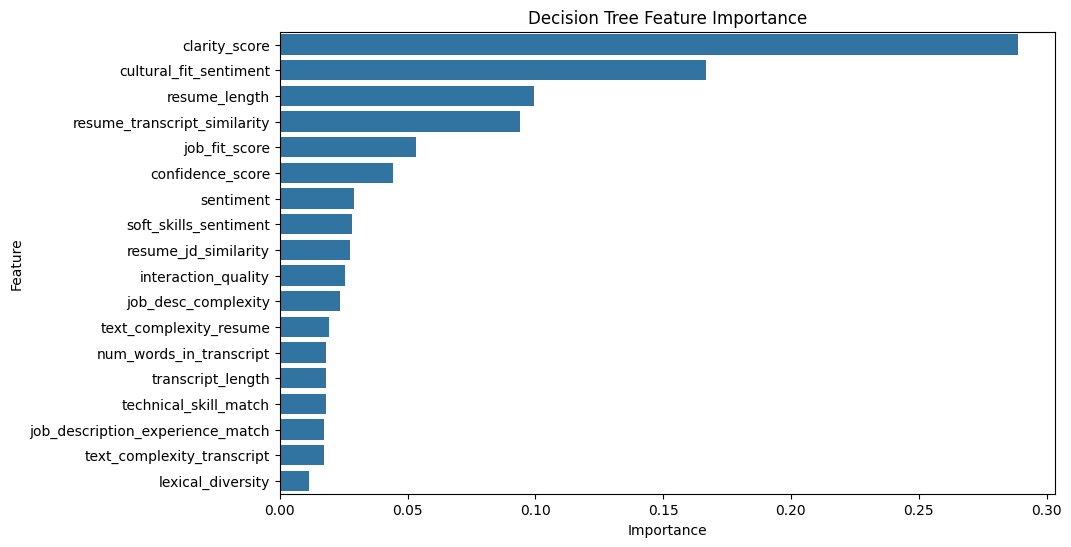

Summary of Feature Importance (Decision Tree):
The plot above shows the feature importance in the Decision Tree model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
clarity_score: Importance = 0.2888
cultural_fit_sentiment: Importance = 0.1666
resume_length: Importance = 0.0994
resume_transcript_similarity: Importance = 0.0940
job_fit_score: Importance = 0.0534


In [15]:
# --- Decision Tree Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_impact_analysis)
plt.title('Decision Tree Feature Importance')
plt.show()

# --- Summary ---
top_dt_features = dt_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Decision Tree):")
print(f"The plot above shows the feature importance in the Decision Tree model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_dt_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_
rf_y_pred = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Random Forest ROC AUC: {rf_roc_auc:.4f}')

Random Forest Accuracy: 86.46%
Random Forest ROC AUC: 0.9610


In [17]:
# Error Analysis
rf_errors = X_test.copy()
rf_errors['True Label'] = y_test
rf_errors['Predicted Label'] = rf_best.predict(X_test)
rf_errors['Error'] = rf_errors['True Label'] != rf_errors['Predicted Label']

# Display a few misclassified instances
misclassified_rf = rf_errors[rf_errors['Error'] == True]
print("Misclassified Instances (Random Forest):")
print(misclassified_rf.head())

Misclassified Instances (Random Forest):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1850                      636              0.181735   
1551                      539              0.335625   
1741                      607              0.207765   
2988                      700              0.323551   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9952                799   
1850                      0.290789     0.9977                881   
1551                      0.430371     0.9971                678   
1741                      0.362281     0.9979                852   
2988                      0.485612     0.9977                888   

      resume_length  job_description_experience_match  \
1655            490                                15   
1850            474                                14   
1551            478                             

In [18]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_rf)

# Professional phrasing
total_misclassified = f'Total number of misclassified instances: {misclassified_count}'
total_misclassified

'Total number of misclassified instances: 86'

In [19]:
# Impact Analysis (using feature importances)
rf_feature_importance = rf_best.feature_importances_
rf_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Random Forest):")
print(rf_impact_analysis)

Impact Analysis (Random Forest):
                             Feature  Importance
2       resume_transcript_similarity    0.131148
15                     clarity_score    0.123056
12            cultural_fit_sentiment    0.098780
14                  confidence_score    0.073123
3                          sentiment    0.058084
17               interaction_quality    0.055353
9                  lexical_diversity    0.053917
7         text_complexity_transcript    0.047876
0            num_words_in_transcript    0.046082
5                      resume_length    0.045824
11             soft_skills_sentiment    0.044002
13                     job_fit_score    0.041022
1               resume_jd_similarity    0.040798
4                  transcript_length    0.033248
10             technical_skill_match    0.032406
8             text_complexity_resume    0.031264
6   job_description_experience_match    0.022318
16               job_desc_complexity    0.021699


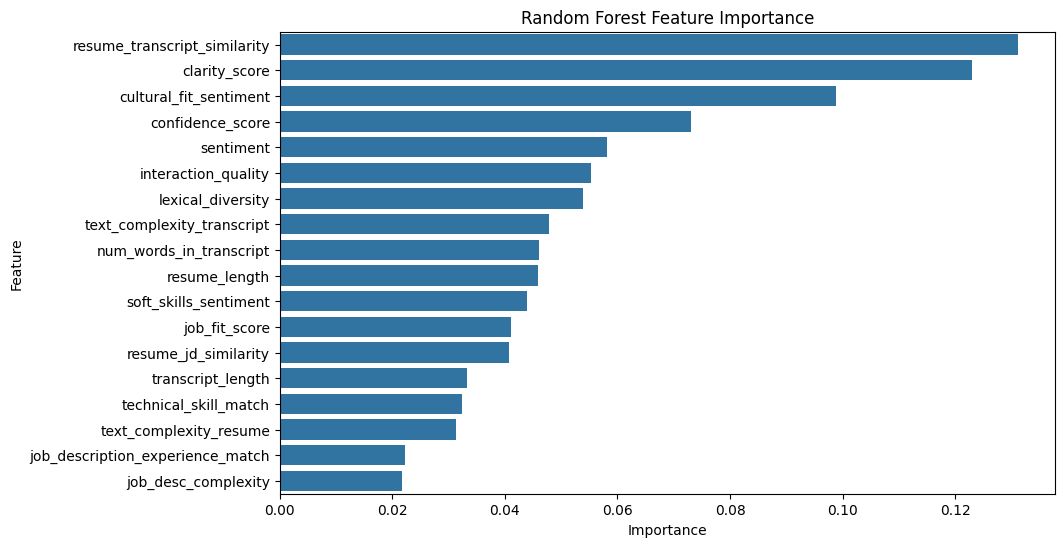

Summary of Feature Importance (Random Forest):
The plot above shows the feature importance in the Random Forest model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
resume_transcript_similarity: Importance = 0.1311
clarity_score: Importance = 0.1231
cultural_fit_sentiment: Importance = 0.0988
confidence_score: Importance = 0.0731
sentiment: Importance = 0.0581


In [20]:
# --- Random Forest Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_impact_analysis)
plt.title('Random Forest Feature Importance')
plt.show()

# --- Summary ---
top_rf_features = rf_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Random Forest):")
print(f"The plot above shows the feature importance in the Random Forest model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_rf_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

XGBoost

In [21]:
from xgboost import XGBClassifier

# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

xgb_best = grid_search.best_estimator_
xgb_y_pred = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])

print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')
print(f'XGBoost ROC AUC: {xgb_roc_auc:.4f}')

XGBoost Accuracy: 88.19%
XGBoost ROC AUC: 0.9670


In [ ]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error'] == True]
print("Misclassified Instances (XGBoost):")
print(misclassified_xgb.head())

Misclassified Instances (XGBoost):
      num_words_in_transcript  resume_jd_similarity  \
1094                      562              0.223817   
1551                      539              0.335625   
1703                      662              0.325212   
1966                      529              0.227032   
3029                      723              0.315481   

      resume_transcript_similarity  sentiment  transcript_length  \
1094                      0.328240     0.9985                834   
1551                      0.430371     0.9971                678   
1703                      0.291638     0.9977                838   
1966                      0.271773     0.9965                691   
3029                      0.446684     0.9995                931   

      resume_length  job_description_experience_match  \
1094            475                                20   
1551            478                                14   
1703            505                                14 

In [23]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_xgb)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 75'

In [24]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(list(xgb_feature_importance.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
print(xgb_impact_analysis)

Impact Analysis (XGBoost):
                             Feature  Importance
5                      resume_length       215.0
15                     clarity_score       214.0
2       resume_transcript_similarity       204.0
12            cultural_fit_sentiment       189.0
7         text_complexity_transcript       188.0
13                     job_fit_score       186.0
1               resume_jd_similarity       164.0
11             soft_skills_sentiment       161.0
10             technical_skill_match       152.0
4                  transcript_length       139.0
0            num_words_in_transcript       136.0
3                          sentiment       120.0
8             text_complexity_resume       115.0
17               interaction_quality       106.0
14                  confidence_score        94.0
16               job_desc_complexity        89.0
6   job_description_experience_match        83.0
9                  lexical_diversity        33.0


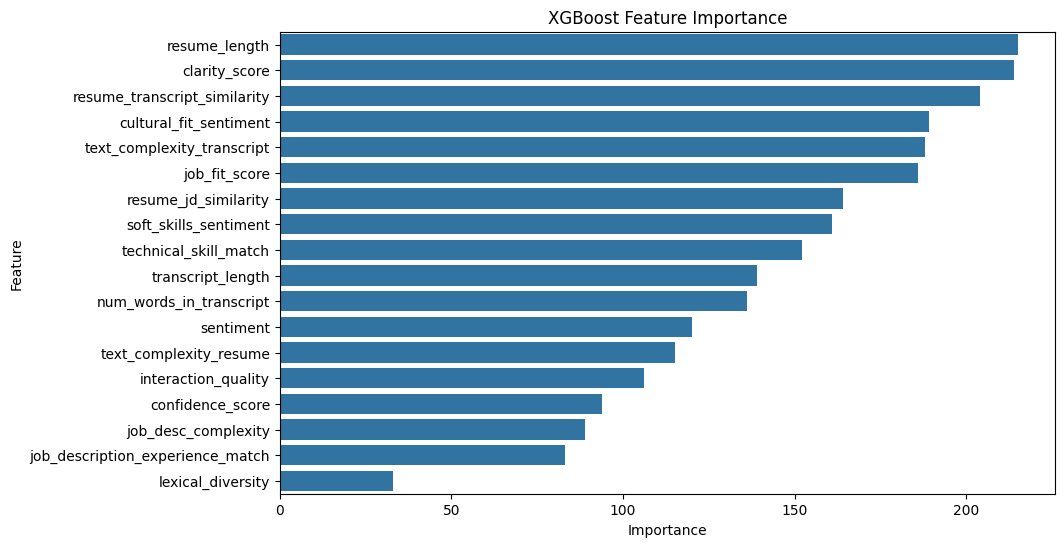

Summary of Feature Importance (XGBoost):
The plot above shows the feature importance in the XGBoost model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
resume_length: Importance = 215.0000
clarity_score: Importance = 214.0000
resume_transcript_similarity: Importance = 204.0000
cultural_fit_sentiment: Importance = 189.0000
text_complexity_transcript: Importance = 188.0000


In [25]:
# --- XGBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (XGBoost):")
print(f"The plot above shows the feature importance in the XGBoost model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

Save the best model

In [26]:
import pickle

# Save the trained model to a pickle file
with open('xgb_best_model.pkl', 'wb') as file:
    pickle.dump(xgb_best, file)

XG Boost is my best model analysis

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 93%|=================== | 2365/2539 [00:12<00:00]       

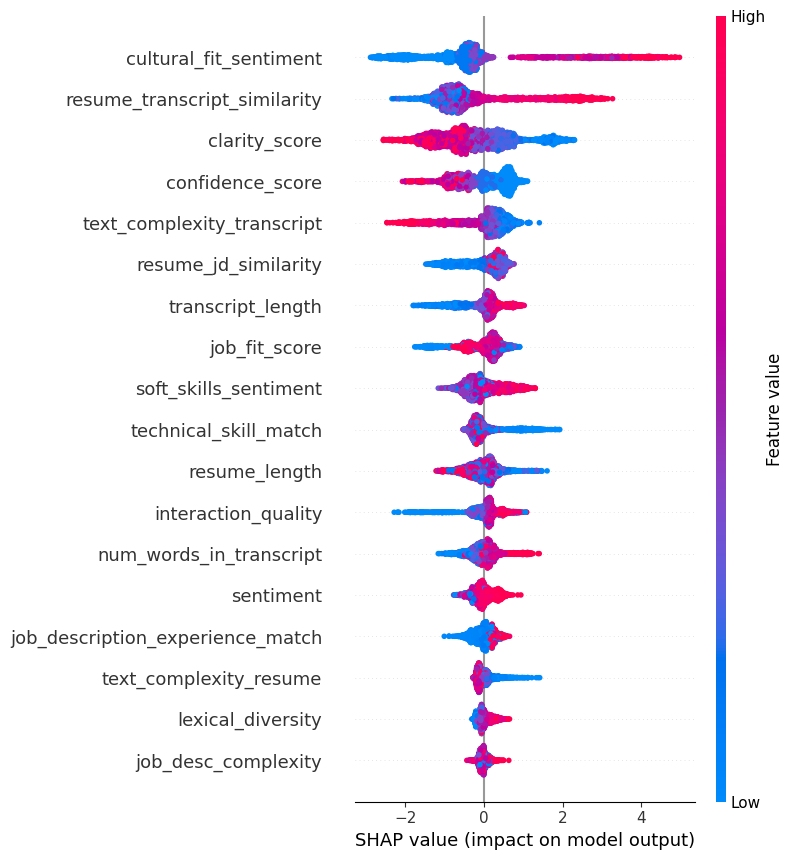

In [27]:
import shap

# Ensure you use the correct trained model, e.g., xgb_best from your tuning process
explainer = shap.Explainer(xgb_best, X_train)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_train)

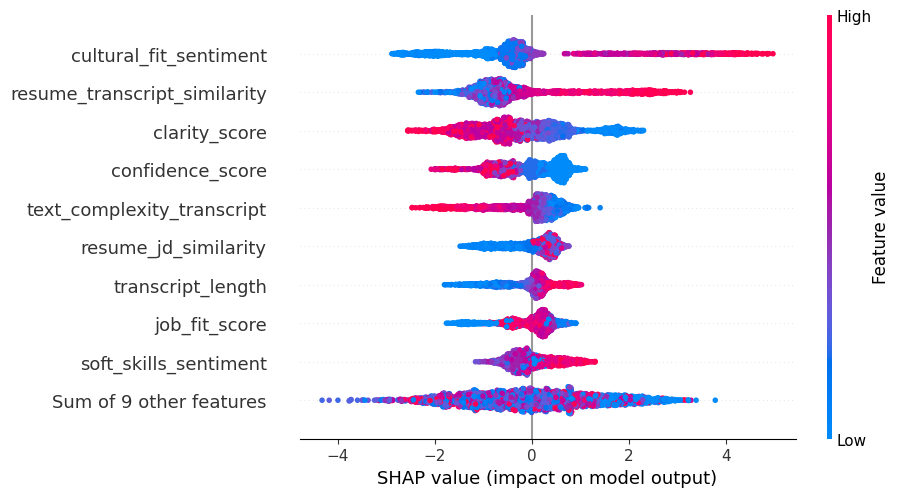

In [28]:
# Beeswarm plot for SHAP values
shap.plots.beeswarm(shap_values)

Feature-Wise Insights (Beeswarm)

1. Cultural Fit Sentiment:

    High values (red) positively influence predictions, significantly pushing the model output higher.

    Low values (blue) have a neutral or slightly negative impact, indicating cultural fit is a critical factor.

2. Clarity Score:

    High values strongly increase the output, highlighting that clarity is a significant determinant.
    
    Low clarity creates a substantial downward pull on predictions.

3. Resume-Transcript Similarity:

    Higher similarity contributes positively to predictions, as alignment between resume and transcript is key.

    Lower similarity has an adverse effect, decreasing the model’s confidence in the prediction.

4. Resume-JD Similarity:

    Similar trends as Resume-Transcript Similarity, showing that resume alignment with job descriptions is critical.

5. Text Complexity in Transcript:

    Moderate complexity (middle SHAP values) positively influences predictions.
    
    Extremely high complexity negatively impacts output, suggesting diminishing returns or misalignment for overly complex text.

6. Transcript Length:

    Optimal length (moderate values) increases predictions.

    Too short or excessively long transcripts pull predictions downward, possibly due to insufficient or verbose communication.

7. Technical Skill Match:

    Strong positive influence for high values, reflecting its critical role in decision-making.

    Low scores drastically reduce predictions.

8. Soft Skills Sentiment:

    High values significantly boost predictions, indicating that soft skills sentiment carries weight.
    
    Low values reduce predictions, showing a penalty for poor sentiment.

9. Job Fit Score:

    Strong correlation with positive predictions when high, signifying its core importance.

10. Sum of Other Features:

    Aggregated minor features show mixed effects but have less overall importance compared to primary features.


In [29]:
base_value  = explainer.expected_value
print(f"Base Value: {base_value}")

Base Value: 0.7874484449253087


In [30]:
shap_values_test = explainer(X_test)  


--- SHAP Waterfall Plot for Instance (LOW prediction) ---


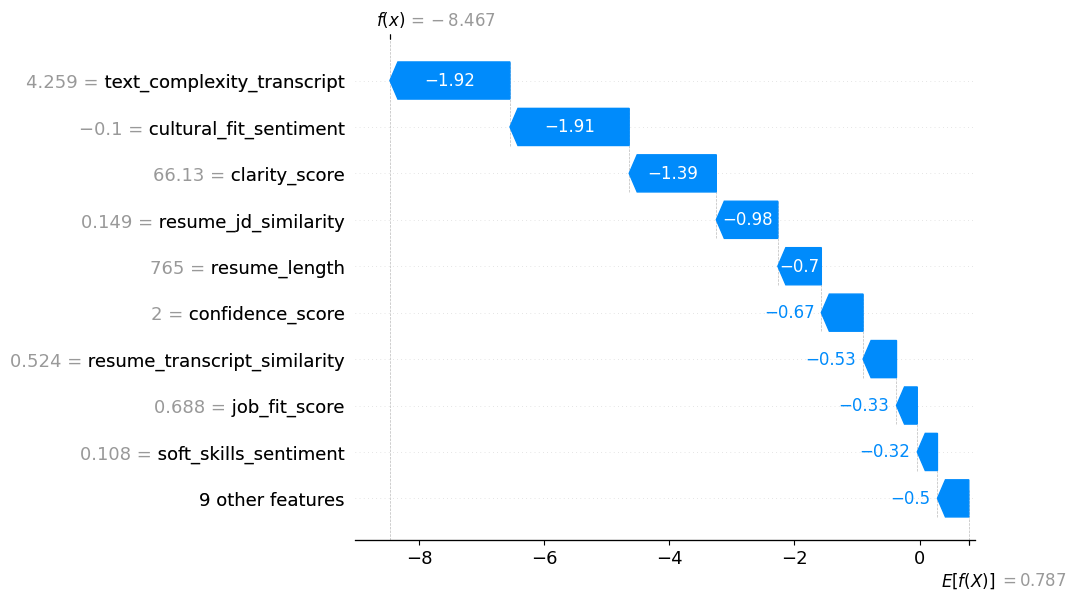


Summary:
Base Probability: 68.7283%
Predicted Probability: 0.0210%

Top Contributing Features:
  - text_complexity_transcript: -1.9192 (decreases prediction)
  - cultural_fit_sentiment: -1.9060 (decreases prediction)
  - clarity_score: -1.3929 (decreases prediction)
  - resume_jd_similarity: -0.9836 (decreases prediction)
  - resume_length: -0.6953 (decreases prediction)

Feature Value Insights:
  - text_complexity_transcript has a value of 4.2589, contributing -1.9192.
  - cultural_fit_sentiment has a value of -0.1000, contributing -1.9060.
  - clarity_score has a value of 66.1300, contributing -1.3929.
  - resume_jd_similarity has a value of 0.1492, contributing -0.9836.
  - resume_length has a value of 765.0000, contributing -0.6953.

--- SHAP Waterfall Plot for Instance (HIGH prediction) ---


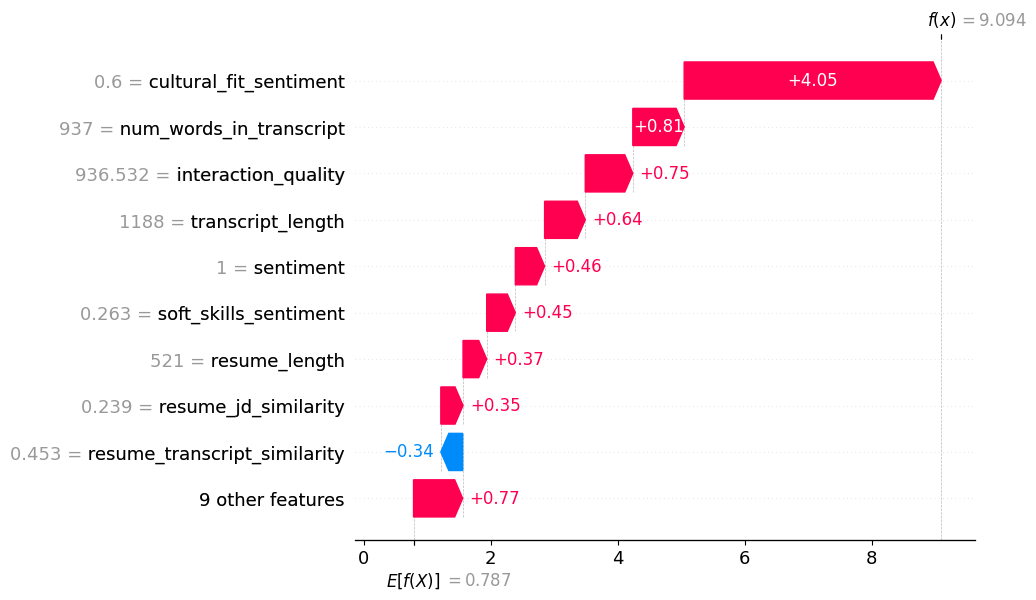


Summary:
Base Probability: 68.7283%
Predicted Probability: 99.9888%

Top Contributing Features:
  - cultural_fit_sentiment: 4.0460 (increases prediction)
  - num_words_in_transcript: 0.8085 (increases prediction)
  - interaction_quality: 0.7482 (increases prediction)
  - transcript_length: 0.6402 (increases prediction)
  - sentiment: 0.4608 (increases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of 0.6000, contributing 4.0460.
  - num_words_in_transcript has a value of 937.0000, contributing 0.8085.
  - interaction_quality has a value of 936.5315, contributing 0.7482.
  - transcript_length has a value of 1188.0000, contributing 0.6402.
  - sentiment has a value of 0.9995, contributing 0.4608.

--- SHAP Waterfall Plot for Instance (MEDIUM prediction) ---


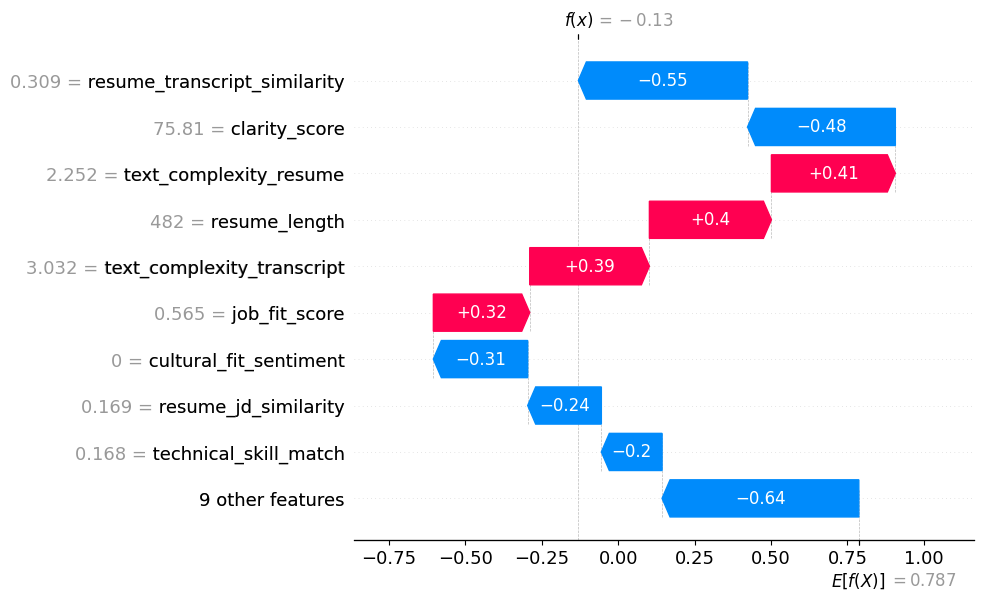


Summary:
Base Probability: 68.7283%
Predicted Probability: 46.7534%

Top Contributing Features:
  - resume_transcript_similarity: -0.5535 (decreases prediction)
  - clarity_score: -0.4835 (decreases prediction)
  - text_complexity_resume: 0.4055 (increases prediction)
  - resume_length: 0.3992 (increases prediction)
  - text_complexity_transcript: 0.3915 (increases prediction)

Feature Value Insights:
  - resume_transcript_similarity has a value of 0.3091, contributing -0.5535.
  - clarity_score has a value of 75.8100, contributing -0.4835.
  - text_complexity_resume has a value of 2.2523, contributing 0.4055.
  - resume_length has a value of 482.0000, contributing 0.3992.
  - text_complexity_transcript has a value of 3.0325, contributing 0.3915.


In [31]:
# Function to find instances based on prediction type
def find_instance_index(predictions, target):
    if target == "low":
        return np.argmin(predictions)  # Instance with the lowest prediction
    elif target == "high":
        return np.argmax(predictions)  # Instance with the highest prediction
    elif target == "medium":
        median_value = np.median(predictions)
        return np.argmin(np.abs(predictions - median_value))  # Closest to the median

# Get predictions from SHAP base + contributions
predictions = [shap_value.base_values + shap_value.values.sum() for shap_value in shap_values_test]

# Find indices for low, high, and medium predictions
low_index = find_instance_index(predictions, "low")
high_index = find_instance_index(predictions, "high")
medium_index = find_instance_index(predictions, "medium")

# Analyze these indices
for instance_index, target in zip([low_index, high_index, medium_index], ["low", "high", "medium"]):
    shap_value = shap_values_test[instance_index]
    
    # Generate the waterfall plot
    print(f"\n--- SHAP Waterfall Plot for Instance ({target.upper()} prediction) ---")
    shap.plots.waterfall(shap_value)
    
    # Extract information for summary
    feature_contributions = shap_value.values
    base_value = shap_value.base_values 
    predicted_value = base_value + feature_contributions.sum() 
    feature_names = shap_value.feature_names
    top_features = sorted(zip(feature_names, feature_contributions), key=lambda x: abs(x[1]), reverse=True)[:5]
    
    # Convert log-odds to probabilities
    base_probability = 1 / (1 + np.exp(-base_value))  
    predicted_probability = 1 / (1 + np.exp(-predicted_value)) 
    
    # Print summary
    print("\nSummary:")
    print(f"Base Probability: {base_probability:.4%}")
    print(f"Predicted Probability: {predicted_probability:.4%}")
    
    print("\nTop Contributing Features:")
    for feature, contribution in top_features:
        direction = "increases" if contribution > 0 else "decreases"
        print(f"  - {feature}: {contribution:.4f} ({direction} prediction)")
    
    # Feature value insight
    print("\nFeature Value Insights:")
    for feature, contribution in top_features:
        feature_index = feature_names.index(feature)
        feature_value = shap_value.data[feature_index]
        print(f"  - {feature} has a value of {feature_value:.4f}, contributing {contribution:.4f}.")


SHAP Dependency Plot

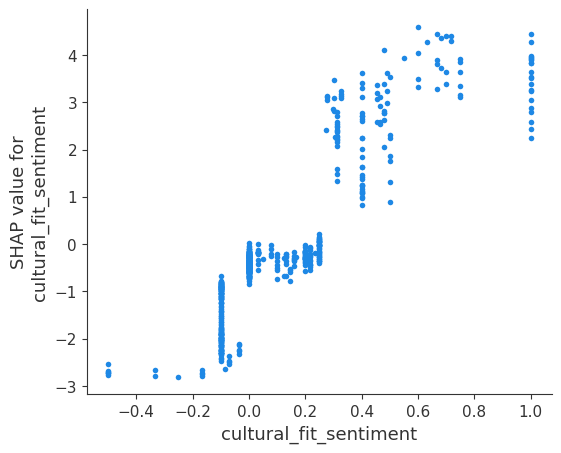

In [32]:
# Dependency Plot Feature 1
features_to_plot = "cultural_fit_sentiment" 
shap.dependence_plot(
    ind=features_to_plot, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)

Higher Cultural Fit Sentiment: Higher values of "cultural_fit_sentiment" generally lead to higher SHAP values, suggesting a stronger positive impact on the model's output.

Clustered Data: Most observations have moderate cultural fit sentiment and SHAP values, indicating that extreme values are less common.

Outliers Impact: Extreme values of cultural fit sentiment can significantly influence the model's predictions, highlighting the importance of considering outliers in the analysis.

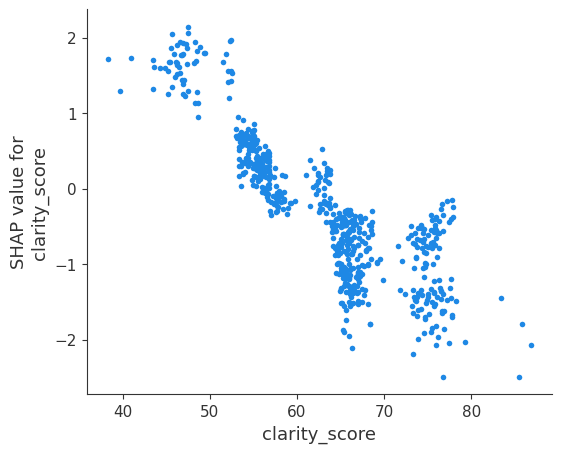

In [33]:
# Dependency Plot Feature 2
feature_name = "clarity_score"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)

Negative Impact: Higher clarity_score negatively influences the model's output, especially when it increases beyond 60.

Clustered Sensitivity: The model shows sensitivity to changes in clarity_score within specific ranges (around 50, 60, and 70).

Extremes: Extreme values of clarity scores (both low and high) have significant impacts on the model's predictions, with low scores having a positive impact and high scores having a negative impact.

There is a noticeable drop in SHAP values as clarity_score increases from 40 to 70, after which the SHAP values stabilize around -3 to -4. This trend indicates that the negative impact of clarity scores on the model's prediction becomes more pronounced until it stabilizes.

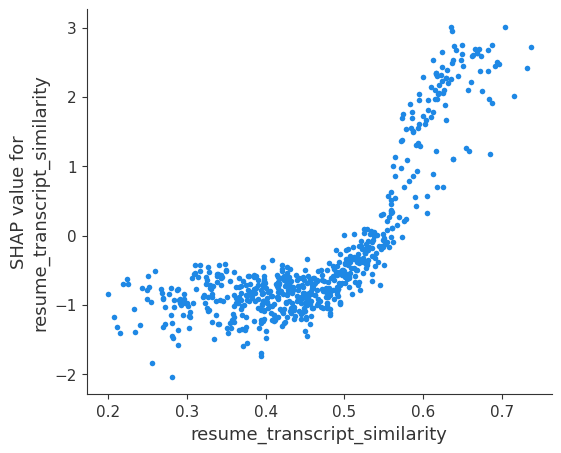

In [34]:
# Dependency Plot for Feature 3
feature_name = "resume_transcript_similarity"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values, 
    feature_names=X_test.columns,  
    interaction_index=None,  
    cmap=plt.cm.Reds  
)

Higher Resume-Transcript Similarity: Higher values of "resume_transcript_similarity" generally lead to higher SHAP values, suggesting a stronger positive impact on the model's output.

Clustered Data: Most observations have moderate resume-transcript similarity and SHAP values, indicating that extreme values are less common.

Outliers Impact: Extreme values of resume-transcript similarity can significantly influence the model's predictions, highlighting the importance of considering outliers in the analysis.

The positive correlation between "resume_transcript_similarity" and "SHAP value for resume_transcript_similarity" can be quantified using the correlation coefficient. A high positive correlation coefficient (close to +1) indicates a strong linear relationship.

A linear regression model can be fitted to the data to quantify the relationship between "resume_transcript_similarity" and SHAP values. The slope of the regression line indicates the rate of increase in SHAP value for a unit increase in resume-transcript similarity.

Partial Dependence Plot

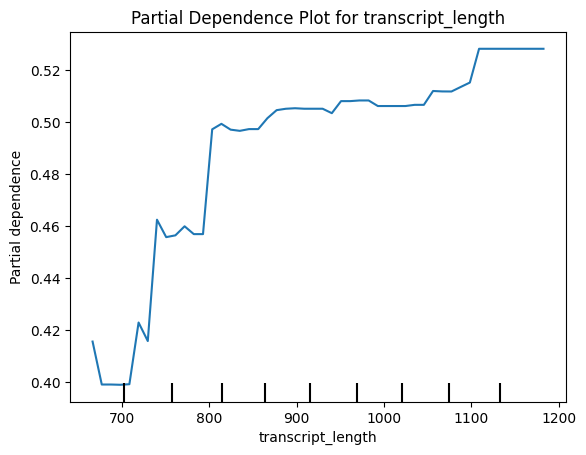

In [35]:
from sklearn.inspection import PartialDependenceDisplay

#PartialDependence Plot for Feature
feature_name = "transcript_length"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,  
    kind="average" 
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


Non-linear Relationship:

The relationship between transcript length and the predicted outcome is non-linear, with significant fluctuations in the middle range (800 to 1000).

Optimal Range:

The range of 700 to 800 appears to be optimal for increasing the predicted outcome, while further increases beyond 1000 show diminishing returns.

Impact of Shorter and Longer Transcripts:

Shorter transcripts (around 700) have a lower impact on the predicted outcome, while longer transcripts (beyond 1000) stabilize and do not significantly affect the predictions.

Trend:

The overall trend shows an initial increase in partial dependence with increasing transcript length, followed by fluctuations and eventual stabilization.

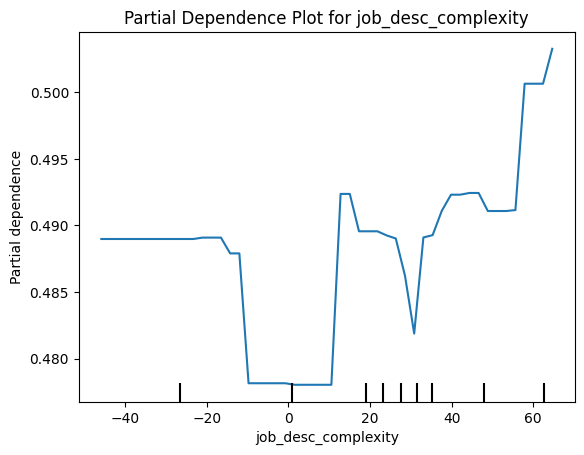

In [36]:
#PartialDependence Plot for Feature2
feature_name = "job_desc_complexity"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test,  
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,
    kind="average"  
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


Negative Impact Zone: When "job_desc_complexity" values are between -20 and 0, the feature has a negative impact on the target variable.

Positive Impact Zone: Values above 0 generally show a positive impact on the target variable, with higher "job_desc_complexity" leading to an increase in the partial dependence value.

Complex Relationship: The fluctuations between 20 and 40 suggest a more intricate relationship, indicating the need for further analysis to understand the underlying factors.

Overall Trend: Despite fluctuations, the overall trend indicates that higher "job_desc_complexity" values tend to positively influence the target variable.

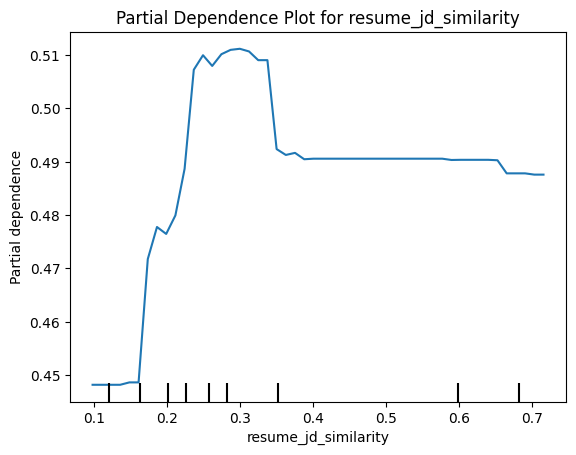

In [37]:
#PartialDependence Plot for Feature3
feature_name = "resume_jd_similarity"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns, 
    grid_resolution=50,  
    kind="average"
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


Higher Sensitivity at Lower Scores:

The model is more sensitive to changes in "resume_jd_similarity" when the similarity score is low (0.1 to 0.3). Small increases in similarity within this range significantly improve the predicted outcome.

Diminishing Returns:

Beyond a similarity score of 0.3, further increases in "resume_jd_similarity" result in smaller improvements in the predicted outcome. This indicates that once a certain level of similarity is achieved, its additional impact becomes less pronounced.

Common Range:

The majority of resumes have lower similarity scores (0.1 to 0.3), highlighting a potential area for improvement in aligning resumes with job descriptions to achieve better predictions.


The concentration of data points at lower similarity scores suggests that most resumes in the dataset have lower similarity scores with job descriptions.


The stabilization of partial dependence beyond 0.3 indicates that further increases in "resume_jd_similarity" have a less significant impact on the predicted outcome.

2D Partial Dependence Plot


--- 2D Partial Dependence Plot for 'cultural_fit_sentiment' and 'clarity_score' ---


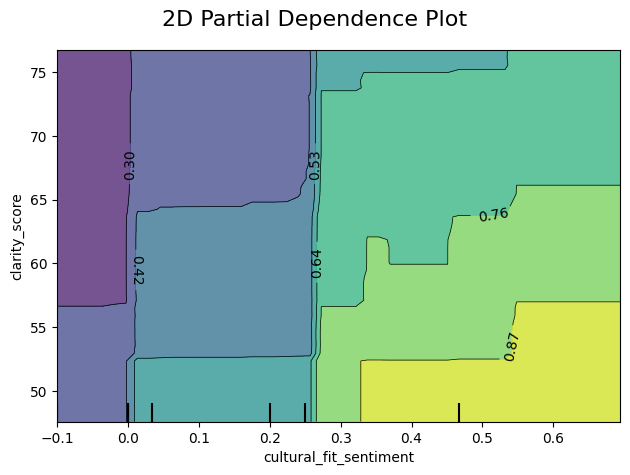

In [38]:
# The top 2 features are cultural_fit_sentiment and clarity_score

features = [('cultural_fit_sentiment', 'clarity_score')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'cultural_fit_sentiment' and 'clarity_score' ---")
PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_train,  
    features=features, 
    grid_resolution=50,
    kind='average',
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

As "cultural_fit_sentiment" increases, there is a gradual increase in the partial dependence value, which suggests a positive relationship between cultural fit sentiment and the target variable.

Similarly, as "clarity_score" increases, the partial dependence value also rises, indicating a positive impact of clarity score on the target variable.

The combined effect of high "cultural_fit_sentiment" and high "clarity_score" results in the highest partial dependence values, suggesting that these two variables together significantly influence the model's predictions.

When clarity_score is low (less than 55), the partial dependence values are higher, ranging from ~0.46 to ~0.51. This suggests that lower clarity_score leads to higher model predictions, regardless of the cultural_fit_sentiment.

As clarity_score increases beyond 60, the partial dependence values decline sharply, ranging from ~0.11 to ~0.36. This decline is more pronounced for higher cultural_fit_sentiment values (greater than 4).

In [39]:
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import optuna
import xgboost as xgb

In [40]:
data = pd.read_csv('new_combined_data.csv')

Distil Bert Model

In [41]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [43]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript',
       'Resume', 'decision', 'Reason for decision', 'Job Description',
       'num_words_in_transcript', 'resume_jd_similarity',
       'resume_transcript_similarity', 'sentiment', 'polarity',
       'lexical_diversity', 'transcript_length', 'technical_skill_match',
       'soft_skills_sentiment', 'resume_length',
       'job_description_experience_match', 'cultural_fit_sentiment',
       'job_fit_score', 'confidence_score', 'job_desc_complexity',
       'interaction_quality', 'clarity_score', 'text_complexity_transcript',
       'text_complexity_resume'],
      dtype='object')

In [44]:
# Custom Dataset for Batch Processing
class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

# Function to get embeddings batch-wise
def generate_embeddings(texts, batch_size=32):
    dataset = TextDataset(texts)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    embeddings = []

    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            encoded_inputs = tokenizer(
                list(batch), return_tensors='pt', truncation=True, padding=True, max_length=512
            )
            encoded_inputs = {key: val.to(device) for key, val in encoded_inputs.items()}
            outputs = model(**encoded_inputs)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
            embeddings.append(batch_embeddings)

    return np.vstack(embeddings)


In [45]:
text_features = ['Transcript','Resume','Reason for decision', 'Job Description', 'polarity']
numerical_features = [
    'num_words_in_transcript', 'resume_jd_similarity', 
    'resume_transcript_similarity', 'sentiment',
    'lexical_diversity', 'transcript_length', 'technical_skill_match',
    'soft_skills_sentiment', 'resume_length',
    'job_description_experience_match', 'cultural_fit_sentiment',
    'job_fit_score', 'confidence_score', 'job_desc_complexity',
    'interaction_quality', 'clarity_score', 
    'text_complexity_transcript', 'text_complexity_resume'
]

In [46]:
# Generate embeddings
for feature in text_features:
    print(f"Generating embeddings for {feature}...")
    data[f'{feature}_embedding'] = list(generate_embeddings(data[feature].tolist()))

print("All embeddings generated successfully.")

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Concatenate all features
embeddings = np.concatenate(
    [np.vstack(data[f'{feat}_embedding'].to_numpy()) for feat in text_features] +
    [data[numerical_features].to_numpy()], axis=1
)

Generating embeddings for Transcript...
Generating embeddings for Resume...
Generating embeddings for Reason for decision...
Generating embeddings for Job Description...
Generating embeddings for polarity...
All embeddings generated successfully.


In [47]:
# Save concatenated embeddings and features back to the dataset
embedding_df = pd.DataFrame(
    embeddings, 
    columns=[f"feature_{i}" for i in range(embeddings.shape[1])]
)

# Add the target column back for supervised learning
embedding_df['decision'] = data['decision'].values

In [48]:
embedding_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3849,feature_3850,feature_3851,feature_3852,feature_3853,feature_3854,feature_3855,feature_3856,feature_3857,decision
0,-0.048704,0.125795,0.037339,-0.021360,0.240732,-0.128751,0.042727,0.524011,-0.203181,-0.217218,...,0.833333,0.333333,0.076585,0.461538,0.504845,0.613356,0.772682,0.435219,0.370576,0
1,-0.131237,0.228924,0.118105,-0.036670,0.255953,-0.108508,0.092743,0.456000,-0.134721,-0.204909,...,0.391667,0.333333,0.210348,0.076923,0.779988,0.768511,0.299537,0.401584,0.429927,1
2,-0.098120,0.131073,0.084949,0.080129,0.290251,-0.052578,0.067133,0.533473,-0.178801,-0.157337,...,0.858333,0.333333,0.072764,0.230769,0.703692,0.582768,0.752163,0.312548,0.469971,0
3,-0.127132,0.171015,0.079485,-0.042877,0.263683,-0.154168,0.084967,0.399158,-0.149684,-0.249491,...,0.750000,0.540741,0.164754,0.000000,0.372348,0.688049,0.543351,0.414987,0.483559,1
4,-0.087818,0.120723,0.111387,0.001174,0.273413,-0.131008,0.075665,0.524928,-0.154856,-0.189027,...,0.725000,0.600000,0.060762,0.307692,0.449969,0.632492,0.533092,0.440336,0.607910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,-0.106005,0.161844,0.112026,0.006522,0.264127,-0.141059,-0.004428,0.416072,-0.134533,-0.122462,...,0.133333,0.333333,0.516057,0.153846,0.770451,0.729232,0.555623,0.399964,0.541649,1
3170,-0.123497,0.169966,0.065711,-0.048899,0.324951,0.001595,0.107780,0.273703,-0.015794,-0.267800,...,0.150000,0.333333,0.591477,0.307692,0.762699,0.699965,0.303762,0.313024,0.534925,0
3171,-0.145148,0.067832,0.154981,-0.001577,0.298735,-0.025296,0.049373,0.360152,-0.024444,-0.309433,...,0.166667,0.500000,0.552929,0.000000,0.760098,0.803279,0.533092,0.351979,0.506818,1
3172,-0.140830,0.050024,0.102557,0.015867,0.274238,-0.065866,-0.025638,0.395195,-0.086869,-0.185233,...,0.141667,0.333333,0.556526,0.076923,0.767901,0.740856,0.352645,0.345215,0.402437,0


In [49]:
# Encode target variable
y = data['decision']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)


In [50]:
# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Define the objective function
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }

    # Silent training with verbose=0
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', verbosity=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)

    # Print ROC and AUC score for the current trial
    print(f"Trial completed - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")
    return roc_auc  # Optimize for AUC

# Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the best parameters and AUC
print("\nBest parameters:", study.best_params)
print("Best ROC-AUC score:", study.best_value)


Trial completed - Accuracy: 0.8898, ROC-AUC: 0.8899
Trial completed - Accuracy: 0.8787, ROC-AUC: 0.8789
Trial completed - Accuracy: 0.8819, ROC-AUC: 0.8820
Trial completed - Accuracy: 0.8850, ROC-AUC: 0.8853
Trial completed - Accuracy: 0.8819, ROC-AUC: 0.8820
Trial completed - Accuracy: 0.8961, ROC-AUC: 0.8962
Trial completed - Accuracy: 0.8835, ROC-AUC: 0.8836
Trial completed - Accuracy: 0.8787, ROC-AUC: 0.8789
Trial completed - Accuracy: 0.8961, ROC-AUC: 0.8962
Trial completed - Accuracy: 0.8740, ROC-AUC: 0.8742

Best parameters: {'max_depth': 6, 'learning_rate': 0.14159831171303822, 'n_estimators': 559, 'subsample': 0.8680416242096616, 'colsample_bytree': 0.7082166242749837, 'gamma': 3.4211829873873514, 'reg_alpha': 2.3479522812359264, 'reg_lambda': 5.261697088765423}
Best ROC-AUC score: 0.8962094758144519


In [51]:
# Best parameters and final model training
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 6, 'learning_rate': 0.14159831171303822, 'n_estimators': 559, 'subsample': 0.8680416242096616, 'colsample_bytree': 0.7082166242749837, 'gamma': 3.4211829873873514, 'reg_alpha': 2.3479522812359264, 'reg_lambda': 5.261697088765423}


In [52]:
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7082166242749837, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=3.4211829873873514, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14159831171303822,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=559, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
# Predictions and evaluation
y_pred = final_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC_AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8960629921259843
ROC_AUC: 0.8962094758144519


In [54]:
y_test_pred_classes = final_model.predict_proba(X_test)
y_test_pred_xgb_distil = np.argmax(y_test_pred_classes, axis=1)

Sentence Transformer

In [55]:
from sentence_transformers import SentenceTransformer

# Define a custom dataset for efficient DataLoader usage
class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

# Function to generate embeddings using CLS Token Pooling with SBERT
def generate_embeddings(texts, model_name='all-MiniLM-L6-v2', batch_size=32, max_length=512):
    """
    Generates embeddings using Sentence Transformers with CLS token pooling.
    Args:
        texts (list): List of texts to embed.
        model_name (str): Pre-trained SentenceTransformer model.
        batch_size (int): Batch size for embedding generation.
        max_length (int): Maximum token length for each text.
    Returns:
        np.ndarray: Generated embeddings.
    """
    # Load the SentenceTransformer model
    model = SentenceTransformer(model_name)
    model.max_seq_length = max_length  # Adjust max token length

    # Dataset and DataLoader for batch processing
    dataset = TextDataset(texts)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    embeddings = []
    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            # Tokenize and encode with CLS token pooling
            batch_embeddings = model.encode(
                batch, 
                batch_size=batch_size,
                convert_to_tensor=True,
                show_progress_bar=False,
                normalize_embeddings=True  # Ensures cosine similarity compatibility
            )
            embeddings.append(batch_embeddings.cpu().numpy())

    return np.vstack(embeddings)

In [56]:
text_features = ['Transcript','Resume','Reason for decision', 'Job Description','polarity']
numerical_features = [
    'num_words_in_transcript', 'resume_jd_similarity', 
    'resume_transcript_similarity', 'sentiment',
    'lexical_diversity', 'transcript_length', 'technical_skill_match',
    'soft_skills_sentiment', 'resume_length',
    'job_description_experience_match', 'cultural_fit_sentiment',
    'job_fit_score', 'confidence_score', 'job_desc_complexity',
    'interaction_quality', 'clarity_score', 
    'text_complexity_transcript', 'text_complexity_resume'
]

In [57]:
# Generate embeddings
for feature in text_features:
    print(f"Generating embeddings for {feature}...")
    data[f'{feature}_embedding'] = list(generate_embeddings(data[feature].tolist()))

print("All embeddings generated successfully.")

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Concatenate all features
embeddings1 = np.concatenate(
    [np.vstack(data[f'{feat}_embedding'].to_numpy()) for feat in text_features] +
    [data[numerical_features].to_numpy()], axis=1
)

Generating embeddings for Transcript...
Generating embeddings for Resume...
Generating embeddings for Reason for decision...
Generating embeddings for Job Description...
Generating embeddings for polarity...
All embeddings generated successfully.


In [58]:
# Save concatenated embeddings and features back to the dataset
embedding_df1 = pd.DataFrame(
    embeddings1, 
    columns=[f"feature_{i}" for i in range(embeddings1.shape[1])]
)

# Add the target column back for supervised learning
embedding_df1['decision'] = data['decision'].values

In [59]:
embedding_df1

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1929,feature_1930,feature_1931,feature_1932,feature_1933,feature_1934,feature_1935,feature_1936,feature_1937,decision
0,-0.087589,0.084175,-0.008520,-0.027508,-0.015328,-0.066478,0.022890,0.072765,-0.064546,-0.006970,...,0.833333,0.333333,0.076585,0.461538,0.504845,0.613356,0.772682,0.435219,0.370576,0
1,-0.136713,0.047159,0.006397,0.018619,-0.029415,-0.154497,0.031236,0.062624,-0.099282,-0.014918,...,0.391667,0.333333,0.210348,0.076923,0.779988,0.768511,0.299537,0.401584,0.429927,1
2,-0.054821,0.003179,0.014176,0.047195,-0.010605,-0.149051,0.037159,0.027634,-0.082209,-0.006898,...,0.858333,0.333333,0.072764,0.230769,0.703692,0.582768,0.752163,0.312548,0.469971,0
3,-0.114528,0.045982,0.014623,0.021302,-0.026010,-0.152267,0.000823,0.059678,-0.088712,-0.031706,...,0.750000,0.540741,0.164754,0.000000,0.372348,0.688049,0.543351,0.414987,0.483559,1
4,-0.095079,0.028903,0.009564,-0.004095,-0.039646,-0.174000,0.028329,0.014707,-0.103673,-0.008380,...,0.725000,0.600000,0.060762,0.307692,0.449969,0.632492,0.533092,0.440336,0.607910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,-0.104514,-0.009513,-0.034277,0.048185,-0.053155,-0.088607,0.084419,-0.011694,-0.044390,0.022772,...,0.133333,0.333333,0.516057,0.153846,0.770451,0.729232,0.555623,0.399964,0.541649,1
3170,-0.062923,0.023802,0.034703,-0.014107,0.033172,-0.026891,0.136209,0.053655,-0.021299,-0.007582,...,0.150000,0.333333,0.591477,0.307692,0.762699,0.699965,0.303762,0.313024,0.534925,0
3171,-0.051464,0.021795,0.033847,0.069617,0.051025,-0.052515,-0.002937,0.082780,-0.089010,-0.055619,...,0.166667,0.500000,0.552929,0.000000,0.760098,0.803279,0.533092,0.351979,0.506818,1
3172,-0.106752,0.019520,0.020833,0.008391,-0.059304,-0.083716,0.033461,0.041888,-0.026378,0.050847,...,0.141667,0.333333,0.556526,0.076923,0.767901,0.740856,0.352645,0.345215,0.402437,0


In [60]:
# Encode target variable
y = data['decision']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(embeddings1, y, test_size=0.2, random_state=42)

In [61]:
# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Define the objective function
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }

    # Silent training with verbose=0
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', verbosity=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)

    # Print ROC and AUC score for the current trial
    print(f"Trial completed - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")
    return roc_auc  # Optimize for AUC

# Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the best parameters and AUC
print("\nBest parameters:", study.best_params)
print("Best ROC-AUC score:", study.best_value)


Trial completed - Accuracy: 0.8992, ROC-AUC: 0.8994
Trial completed - Accuracy: 0.8850, ROC-AUC: 0.8852
Trial completed - Accuracy: 0.8787, ROC-AUC: 0.8789
Trial completed - Accuracy: 0.8913, ROC-AUC: 0.8915
Trial completed - Accuracy: 0.8803, ROC-AUC: 0.8805
Trial completed - Accuracy: 0.8898, ROC-AUC: 0.8899
Trial completed - Accuracy: 0.8898, ROC-AUC: 0.8900
Trial completed - Accuracy: 0.8898, ROC-AUC: 0.8899
Trial completed - Accuracy: 0.8819, ROC-AUC: 0.8820
Trial completed - Accuracy: 0.8772, ROC-AUC: 0.8774

Best parameters: {'max_depth': 8, 'learning_rate': 0.09483115191236118, 'n_estimators': 123, 'subsample': 0.7632142877181045, 'colsample_bytree': 0.8782296925758553, 'gamma': 0.3730565844003081, 'reg_alpha': 1.7927670963484899, 'reg_lambda': 4.805245013254944}
Best ROC-AUC score: 0.8993591524145866


In [62]:
best_params = study.best_params
final_model2 = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model2.fit(X_train, y_train)

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:25:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8782296925758553, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.3730565844003081, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09483115191236118,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=123, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
# Predictions and evaluation
y_pred = final_model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC_AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8992125984251969
ROC_AUC: 0.8993591524145866


In [64]:
y_test_pred_classes = final_model2.predict_proba(X_test)
y_test_pred_xgb_sen= np.argmax(y_test_pred_classes, axis=1)

In [65]:
# Save the model using pickle
with open('sentence_transformer_model.pkl', 'wb') as file:
    pickle.dump(final_model2, file)

ANN

In [66]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create and train the model for Optuna optimization
def objective(trial):
    model = Sequential()
    
    # Hyperparameter tuning for number of units and layers
    units_1 = trial.suggest_int('units_1', 32, 256, step=32)
    dropout_1 = trial.suggest_float('dropout_1', 0.1, 0.5, step=0.1)
    units_2 = trial.suggest_int('units_2', 32, 128, step=32)
    dropout_2 = trial.suggest_float('dropout_2', 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    
    # Build the model
    model.add(Dense(units=units_1, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=dropout_1))
    model.add(Dense(units=units_2, activation='relu'))
    model.add(Dropout(rate=dropout_2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluate the model on validation data
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]  # Return validation accuracy

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best parameters and train the final model
best_params = study.best_params
print("Best Hyperparameters:", best_params)

C:\Users\Durgesh Babu\AppData\Local\Temp\ipykernel_4876\4015348251.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)


Best Hyperparameters: {'units_1': 64, 'dropout_1': 0.4, 'units_2': 32, 'dropout_2': 0.5, 'learning_rate': 0.008576912369759174}


In [67]:
# Final model using the best parameters
final_model1 = Sequential()
final_model1.add(Dense(units=best_params['units_1'], activation='relu', input_dim=X_train.shape[1]))
final_model1.add(Dropout(rate=best_params['dropout_1']))
final_model1.add(Dense(units=best_params['units_2'], activation='relu'))
final_model1.add(Dropout(rate=best_params['dropout_2']))
final_model1.add(Dense(1, activation='sigmoid'))

final_model1.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

# Train the final model
final_model1.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the final model
final_accuracy = final_model1.evaluate(X_test, y_test)
print(f"Final Model Test Accuracy: {final_accuracy[1]:.4f}")


Epoch 1/100
159/159 [==============================] - 2s 6ms/step - loss: 0.4150 - accuracy: 0.7641 - val_loss: 0.1701 - val_accuracy: 0.8772
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2487 - accuracy: 0.8570 - val_loss: 0.1625 - val_accuracy: 0.8787
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2297 - accuracy: 0.8622 - val_loss: 0.1627 - val_accuracy: 0.8772
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2167 - accuracy: 0.8685 - val_loss: 0.1640 - val_accuracy: 0.8740
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2168 - accuracy: 0.8625 - val_loss: 0.1633 - val_accuracy: 0.8724
Epoch 6/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2231 - accuracy: 0.8633 - val_loss: 0.1627 - val_accuracy: 0.8756
Epoch 7/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2241 - accuracy: 0.8566 - val_loss: 0.1712 - val_accuracy: 0.8740

In [68]:
y_test_pred_nn = final_model1.predict(X_test)

20/20 [==============================] - 0s 2ms/step


In [69]:
test_df = pd.DataFrame()
test_df['actual'] = y_test
test_df['xg_distil_bert'] = y_test_pred_xgb_distil
test_df['xg_sen_transformer'] = y_test_pred_xgb_sen
test_df['nn_prediction'] = y_test_pred_nn

In [70]:
test_df

,actual,xg_distil_bert,xg_sen_transformer,nn_prediction
2270,1,1,1,1.000000e+00
442,1,1,1,1.000000e+00
2885,1,1,1,1.000000e+00
1655,1,1,0,4.726280e-01
1001,0,0,0,0.000000e+00
...,...,...,...,...
282,0,0,0,2.108177e-36
1953,1,1,1,4.726280e-01
691,0,0,0,0.000000e+00
794,0,0,0,0.000000e+00


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred),
    }

# Majority voting
test_df['ensemble_vote'] = (test_df[['xg_distil_bert', 'xg_sen_transformer', 'nn_prediction']].mean(axis=1) > 0.5).astype(int)

# Evaluate ensemble performance
ensemble_metrics = calculate_metrics(test_df['actual'], test_df['ensemble_vote'])
print("Ensemble Metrics:", ensemble_metrics)

Ensemble Metrics: {'Accuracy': 0.8929133858267716, 'Precision': 0.9466192170818505, 'Recall': 0.8338557993730408, 'F1-Score': 0.8866666666666667, 'ROC-AUC': 0.8931937224713306}


In [72]:
# Mean

test_df['mean_prob'] = (test_df['xg_distil_bert'] + test_df['xg_sen_transformer'] + test_df['nn_prediction'])/3

In [73]:
test_df['new_pred'] = test_df['mean_prob'].round()
test_df['new_nn_prediction'] = test_df['nn_prediction'].round()
test_df

,actual,xg_distil_bert,xg_sen_transformer,nn_prediction,ensemble_vote,mean_prob,new_pred,new_nn_prediction
2270,1,1,1,1.000000e+00,1,1.000000e+00,1.0,1.0
442,1,1,1,1.000000e+00,1,1.000000e+00,1.0,1.0
2885,1,1,1,1.000000e+00,1,1.000000e+00,1.0,1.0
1655,1,1,0,4.726280e-01,0,4.908760e-01,0.0,0.0
1001,0,0,0,0.000000e+00,0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...
282,0,0,0,2.108177e-36,0,7.027257e-37,0.0,0.0
1953,1,1,1,4.726280e-01,1,8.242093e-01,1.0,0.0
691,0,0,0,0.000000e+00,0,0.000000e+00,0.0,0.0
794,0,0,0,0.000000e+00,0,0.000000e+00,0.0,0.0


Accuracy for actual with ensembing

In [74]:
print(accuracy_score(test_df['actual'], test_df['new_pred']))
print(roc_auc_score(test_df['actual'], test_df['new_pred']))

0.8929133858267716
0.8931937224713306


Accuracy for actual with distil bert

In [75]:
print(accuracy_score(test_df['actual'], test_df['xg_distil_bert']))
print(roc_auc_score(test_df['actual'], test_df['xg_distil_bert']))

0.8960629921259843
0.8962094758144519


Accuracy for actual with sentence transformer

In [76]:
print(accuracy_score(test_df['actual'], test_df['xg_sen_transformer']))
print(roc_auc_score(test_df['actual'], test_df['xg_sen_transformer']))

0.8992125984251969
0.8993591524145866


Accuracy for actual with ANN

In [77]:
print(accuracy_score(test_df['actual'], test_df['new_nn_prediction']))
print(roc_auc_score(test_df['actual'], test_df['new_nn_prediction']))

0.8771653543307086
0.8777280663465735


In [78]:
print(roc_auc_score(test_df['actual'], test_df['nn_prediction']))

0.9751745962461806
